In [1]:
import os
import warnings
import pandas as pd

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from synthesized.core import ScenarioSynthesizer

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2DF3-5D2D-B5F3
Expires at: 2019-06-30 00:00:00


In [3]:
import json

In [4]:
with open('configs/scenarios/example.json', 'r') as f:
    scenario = json.load(f)

In [5]:
scenario

{'values': {'value1': 'continuous',
  'value2': 'continuous',
  'value3': 'continuous'},
 'functionals': [{'module': 'mean', 'output': 'value1', 'mean': 1.0},
  {'module': 'mean', 'output': 'value2', 'mean': -1.0},
  {'module': 'mean', 'output': 'value3', 'mean': 0.0},
  {'module': 'variance', 'output': 'value1', 'variance': 0.2},
  {'module': 'variance', 'output': 'value2', 'variance': 0.4},
  {'module': 'variance', 'output': 'value3', 'variance': 0.1},
  {'module': 'correlation',
   'output1': 'value1',
   'output2': 'value2',
   'correlation': 0.7},
  {'module': 'correlation_matrix',
   'correlation_matrix': [[1.0, 0.7, 0.0], [0.7, 1.0, 0.2], [0.0, 0.2, 1.0]]}]}

In [6]:
synthesizer = ScenarioSynthesizer(
        values=scenario['values'], functionals=scenario['functionals']
)

In [7]:
with synthesizer:
    synthesizer.learn(num_iterations=5000, num_samples=1024, verbose=1000)
    synthesized = synthesizer.synthesize(n=1024)


iteration: 1
loss: total=2.74e+00 (mean-value1=1.0140020847320557, mean-value2=0.992668628692627, mean-value3=0.00030227741808630526, variance-value1=0.038972362875938416, variance-value2=0.15820464491844177, variance-value3=0.009667690843343735, correlation-value1-value2=0.41994062066078186, correlationmatrix=0.10893148183822632, regularization=1.6482686987728812e-05, loss=2.742706298828125)

iteration: 500
loss: total=1.18e-02 (mean-value1=6.963318810448982e-11, mean-value2=4.2116903387068305e-07, mean-value3=6.47771742023906e-07, variance-value1=2.782890987873543e-06, variance-value2=8.837430698349635e-08, variance-value3=0.009446959011256695, correlation-value1-value2=3.095648571616039e-05, correlationmatrix=0.0022470431867986917, regularization=7.01600220054388e-05, loss=0.011799058876931667)

iteration: 1000
loss: total=8.11e-03 (mean-value1=2.5056010599655565e-07, mean-value2=5.533365765586495e-07, mean-value3=9.392077338077343e-09, variance-value1=1.034631054608326e-06, varian

In [8]:
scenario

{'values': {'value1': 'continuous',
  'value2': 'continuous',
  'value3': 'continuous'},
 'functionals': [{'module': 'mean', 'output': 'value1', 'mean': 1.0},
  {'module': 'mean', 'output': 'value2', 'mean': -1.0},
  {'module': 'mean', 'output': 'value3', 'mean': 0.0},
  {'module': 'variance', 'output': 'value1', 'variance': 0.2},
  {'module': 'variance', 'output': 'value2', 'variance': 0.4},
  {'module': 'variance', 'output': 'value3', 'variance': 0.1},
  {'module': 'correlation',
   'output1': 'value1',
   'output2': 'value2',
   'correlation': 0.7},
  {'module': 'correlation_matrix',
   'correlation_matrix': [[1.0, 0.7, 0.0], [0.7, 1.0, 0.2], [0.0, 0.2, 1.0]]}]}

In [9]:
synthesized['value1'].mean()

1.0008487

In [10]:
synthesized['value2'].mean()

-0.9996329

In [11]:
synthesized['value3'].mean()

0.00019956357

In [22]:
synthesized['value1'].std()**2

0.19950332934232407

In [23]:
synthesized['value2'].std()**2

0.3977266946005784

In [24]:
synthesized['value3'].std()**2

0.10006877032704953

In [15]:
synthesized['value1'].corr(synthesized['value2'])

0.7059985918008986

In [16]:
synthesized.corr()

,value1,value2,value3
value1,1.000000,0.705999,-0.000767
value2,0.705999,1.000000,0.206572
value3,-0.000767,0.206572,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126f38a90>,
      dtype=object)

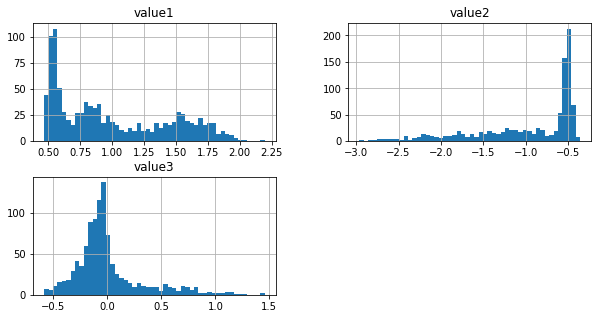

In [17]:
synthesized.hist(bins=50, figsize=(10, 5))

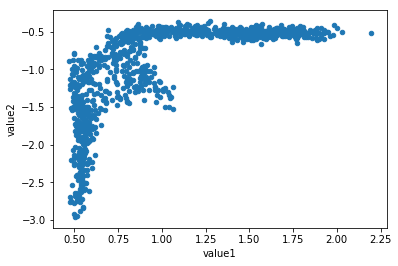

In [18]:
synthesized.plot.scatter('value1', 'value2')

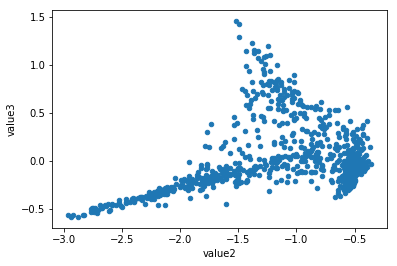

In [19]:
synthesized.plot.scatter('value2', 'value3')

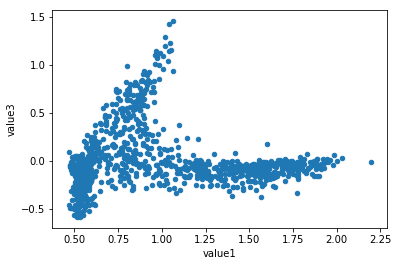

In [20]:
synthesized.plot.scatter('value1', 'value3')